# Fit to a curve in a logarithmic plane

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
import pandas as pd

Consider the following set of points:

<img src="./lux2016.png" width="400"/>

In [57]:
df=pd.read_csv('lux2016.csv')

In [58]:
df.columns

Index([u'M', u'sigma'], dtype='object')

In [59]:
x=df.columns[0]
y=df.columns[1]
df[y]=1E36*df[y]

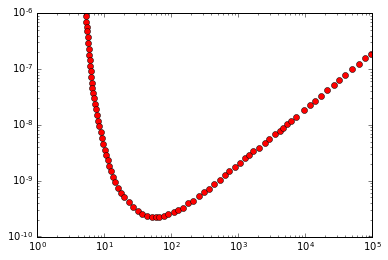

In [60]:
plt.loglog(df[x],df[y],'ro')

## Exponential fit
The curve can be decomposed in approximately straight lines. In the $(\log x,\log y)$-plan one straight line is described by $y = Ae^{Bx}$ for some $A$ and $B$.

From: http://stackoverflow.com/a/3433503/2268280:

For fitting $y = Ae^{Bx}$, take the logarithm of both side gives $\log y = \log A + Bx$. So just fit $\log y$ against $x$.
### Straight segments
Will be obtained by trial and error. If one segment is not good enough it will be possible to delete it.
## Object design
The object, e,g: `fit`, will be initialized with the `x` and `y` arrays:
It will have the following methods
* `add_segment(xmin,xmax,ShowPlot=True)`
* `del_last_segment()`
* `to_csv(file)` to write the data of the fit
* `read_csv(file)` to read the data with the fit

Once the fit have been build or read it can be used just by calling the object with a point or an array

In [61]:
from straightfits import *

Intialize class and add first segment. Add a point with the object function and also an array

In [62]:
pf=straightfits(df[x].values,df[y].values)

Add first segment

In [63]:
df[x].min()

5.3539369216300008

(0.071645110311976026, -2.1420890747897761)

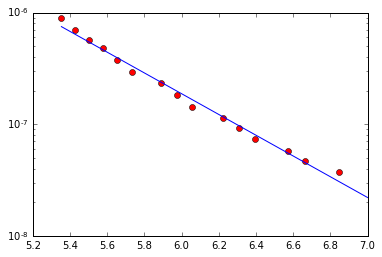

In [64]:
pf.add_segment(df[x].min(),7)

Complete the full range by adding straight line segment and deleting them if necessary

(1.3887917506060035e-07, -0.32299363040278156)

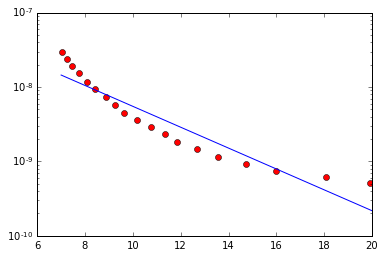

In [32]:
pf.add_segment(7,20)

In [33]:
pf.delete_last_segment()

(3.6228049358251317e-06, -0.69929674914048412)

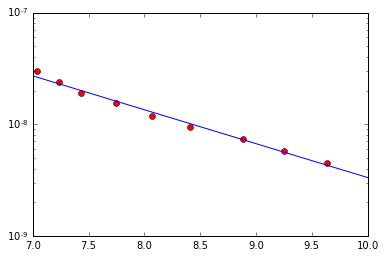

In [65]:
xmax=10
pf.add_segment(7,xmax)

[  5.35393692   7.          10.          15.        ]
[  0.00000000e+00   7.16451103e-02   3.62280494e-06   7.11666431e-08]
[ 0.         -2.14208907 -0.69929675 -0.30092343]


2.7110649060199728e-08

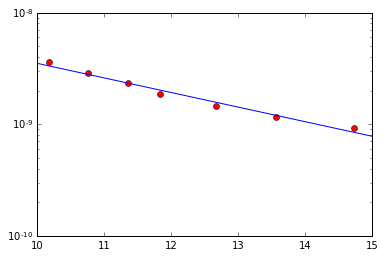

In [66]:
xmax=15
pf.add_segment(10,xmax)
print pf.corners
print pf.A
print pf.B
pf(7)

[  5.35393692   7.          10.          15.          25.        ]
[  0.00000000e+00   7.16451103e-02   3.62280494e-06   7.11666431e-08
   2.71686056e-09]
[ 0.         -2.14208907 -0.69929675 -0.30092343 -0.08192534]


2.7110649060199728e-08

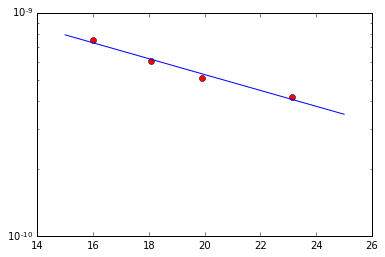

In [67]:
xmax=25
pf.add_segment(15,xmax)
print pf.corners
print pf.A
print pf.B
pf(7)

(7.8344140704207348e-10, -0.031547049646518541)

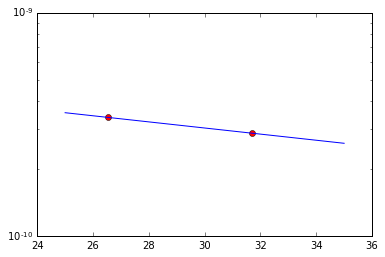

In [68]:
xmax=35
pf.add_segment(25,xmax)

(2.7551236337434929e-10, -0.0034926998994139302)

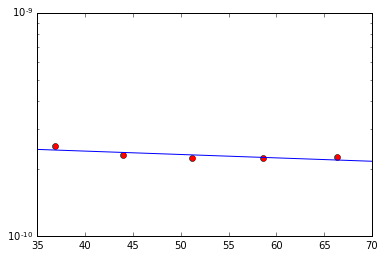

In [69]:
xmax=70
pf.add_segment(35,xmax)

4.2979772340926722e-10

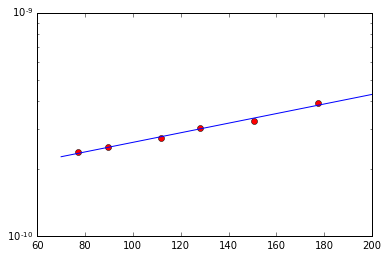

In [70]:
xmax=200
pf.add_segment(70,xmax)
pf(199.9)

4.3367302344656752e-10

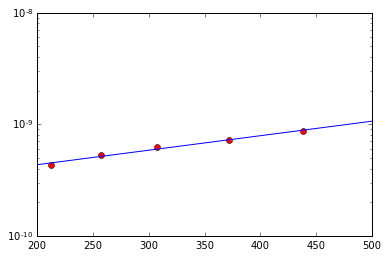

In [71]:
xmax=500
pf.add_segment(200,xmax)
pf(200)

4.3367302344656752e-10

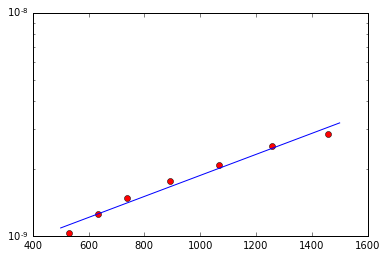

In [72]:
xmax=1500
pf.add_segment(500,xmax)
pf(200)

(2.0513287466756602e-09, 0.00032624399030567436)

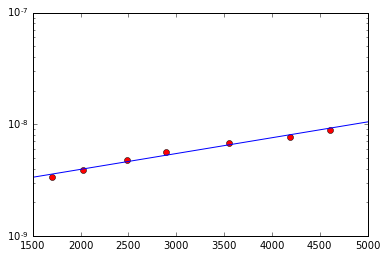

In [73]:
xmax=5000
pf.add_segment(1500,xmax)

(4.982958485708113e-09, 0.00013803717512217217)

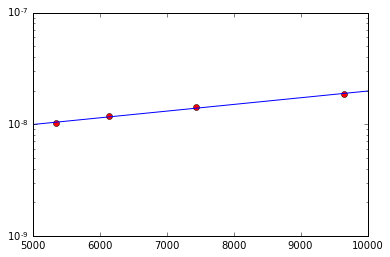

In [74]:
xmax=10000
pf.add_segment(5000,xmax)

(1.1565215200870226e-08, 5.9343027124153988e-05)

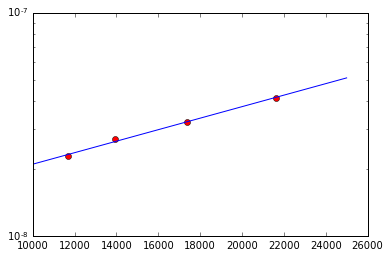

In [75]:
xmax=25000
pf.add_segment(10000,xmax)

(2.4510774269869575e-08, 2.8663258927680274e-05)

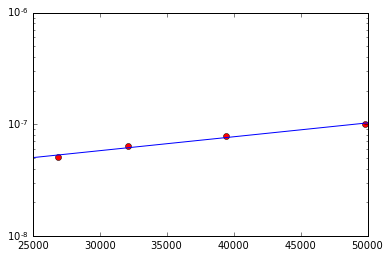

In [76]:
xmax=50000
pf.add_segment(25000,xmax)

(5.541338536855835e-08, 1.2857413085552361e-05)

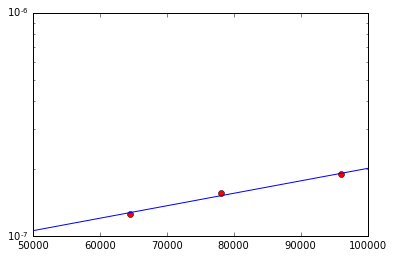

In [77]:
xmax=100000
pf.add_segment(50000,xmax)

[  0.00000000e+00   7.16451103e-02   3.62280494e-06   7.11666431e-08
   2.71686056e-09   7.83441407e-10   2.75512363e-10   1.59933164e-10
   2.38400247e-10   6.30677651e-10   2.05132875e-09   4.98295849e-09
   1.15652152e-08   2.45107743e-08   5.54133854e-08]
[  0.00000000e+00  -2.14208907e+00  -6.99296749e-01  -3.00923434e-01
  -8.19253357e-02  -3.15470496e-02  -3.49269990e-03   4.94526605e-03
   2.99169939e-03   1.08386056e-03   3.26243990e-04   1.38037175e-04
   5.93430271e-05   2.86632589e-05   1.28574131e-05]
[  5.35393692e+00   7.00000000e+00   1.00000000e+01   1.50000000e+01
   2.50000000e+01   3.50000000e+01   7.00000000e+01   2.00000000e+02
   5.00000000e+02   1.50000000e+03   5.00000000e+03   1.00000000e+04
   2.50000000e+04   5.00000000e+04   1.00000000e+05]


4.3367302344656752e-10

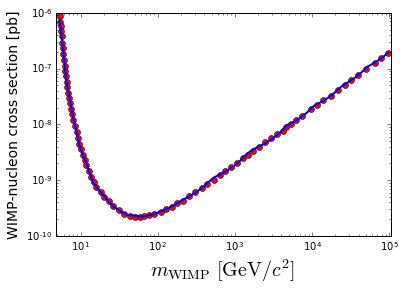

In [104]:
print pf.A
print pf.B
print pf.corners
df=pd.DataFrame()
df['x']=pf.x
df['y']=pf.y
plt.loglog(df.x,df.y,'ro')
xx=np.logspace(np.log10(df.x.min()),np.log10(df.x.max()-0.1))
plt.plot(xx,pf(xx),'b-',lw=2)
plt.xlim(df.x.min()*0.9,df.x.max()*1.1)
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)
pf(200)

## Save to file

In [92]:
pf.to_csv('fitlux2016.csv')

## Recover fit from file

In [93]:
ff=straightfits()
ff.read_csv('fitlux2016.csv')

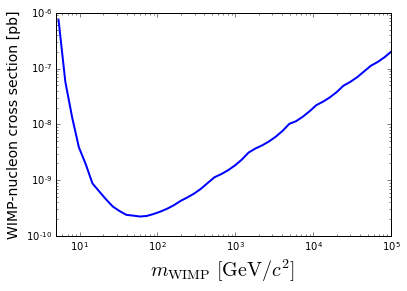

In [110]:
xx=np.logspace( np.log10(ff.corners.min()),np.log10(ff.corners.max()-0.1) )
plt.loglog(xx,ff(xx),'b-',lw=2)
plt.xlim(5,ff.corners.values[-1:])
plt.xlabel(r'$m_{\rm WIMP}\ [{\rm GeV}/c^2]$ ',size=20)
plt.ylabel(r'WIMP-nucleon cross section [pb]',size=14)

## See further examples:
[examples](./examples/example_straightfits.ipynb)